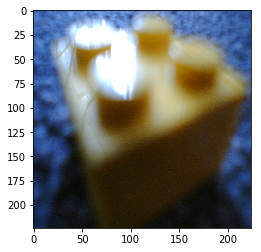

In [46]:
import keras
import cv2
import numpy as np
from matplotlib import pyplot as plt

model = keras.applications.mobilenet.MobileNet(input_shape=(224,224,3), alpha=1.0, 
    depth_multiplier=1, dropout=1e-3, include_top=False, weights='imagenet', input_tensor=None, pooling=None)

from scipy import misc

bbox_images = np.load('bbox_images.npy')
cap = cv2.VideoCapture(0)
_, brick = cap.read()
brick = cv2.resize(brick, (224,224))
data = []
brick_predictions =  model.predict(np.expand_dims(brick, 0)).reshape(-1)

plt.imshow(bgr2rgb(brick))

In [157]:
cap.read()

(True, array([[[ 31,  35,  34],
         [ 29,  33,  32],
         [ 33,  33,  33],
         ..., 
         [ 51,  61,  55],
         [ 49,  61,  55],
         [ 49,  61,  55]],
 
        [[ 29,  33,  32],
         [ 29,  33,  32],
         [ 33,  33,  33],
         ..., 
         [ 51,  63,  58],
         [ 47,  60,  58],
         [ 48,  61,  59]],
 
        [[ 32,  32,  32],
         [ 32,  32,  32],
         [ 33,  33,  33],
         ..., 
         [ 52,  64,  59],
         [ 49,  60,  58],
         [ 49,  60,  58]],
 
        ..., 
        [[ 70, 109, 103],
         [ 76, 115, 109],
         [ 75, 110, 102],
         ..., 
         [161, 139, 125],
         [160, 138, 124],
         [160, 138, 124]],
 
        [[ 75, 107, 102],
         [ 77, 109, 104],
         [ 76, 109, 101],
         ..., 
         [159, 140, 123],
         [161, 137, 123],
         [162, 138, 124]],
 
        [[ 78, 103,  99],
         [ 76, 101,  97],
         [ 71, 101,  96],
         ..., 
         [156, 14

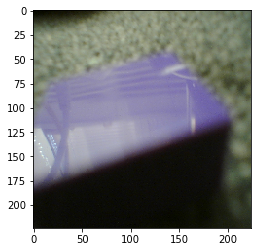

In [168]:
_, brick = cap.read()
brick = cv2.resize(brick, (224,224))
data = []
brick_predictions =  model.predict(np.expand_dims(brick, 0)).reshape(-1)

plt.imshow(bgr2rgb(brick))

In [47]:
def bgr2rgb(brick):
  brick2 = np.copy(brick)
  brick2[:,:,0] = brick[:,:,2]
  brick2[:,:,2] = brick[:,:,0]
  return brick2

In [172]:
data = []
for img in bbox_images:
    img = cv2.resize(img, (224,224))

    predictions = model.predict(np.expand_dims(img, 0))
    data.append(predictions.reshape(-1))

brick_predictions.shape


(50176,)

In [137]:
brick_predictions.shape

(50176,)

In [49]:
data = np.asarray(data)[]
mse = data - brick_predictions
mse = np.square(mse)
mse = np.sum(mse, axis=1)

In [144]:
min_index = np.argmin(mse)
min_index

1

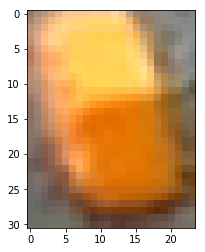

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(bgr2rgb(bbox_images[2]))

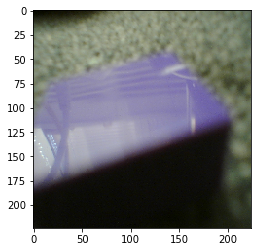

In [169]:
brick2 = np.copy(brick)
brick2[:,:,0] = brick[:,:,2]
brick2[:,:,2] = brick[:,:,0]

plt.imshow(brick2)

In [53]:
import numpy as np

x_train = np.linspace(-3, 3, num=50)
y_train = np.cos(x_train) + np.random.normal(0, 0.1, size=50)
x_train = x_train.astype(np.float32).reshape((50, 1))
y_train = y_train.astype(np.float32).reshape((50, 1))

# Edward part

In [54]:
def build_toy_dataset(N):
  pi = np.array([0.4, 0.6])
  mus = [[1, 1], [-1, -1]]
  stds = [[0.1, 0.1], [0.1, 0.1]]
  x = np.zeros((N, 2), dtype=np.float32)
  for n in range(N):
    k = np.argmax(np.random.multinomial(1, pi))
    x[n, :] = np.random.multivariate_normal(mus[k], np.diag(stds[k]))

  return x

N = 500  # number of data points
D = 2  # dimensionality of data

x_train = build_toy_dataset(N)

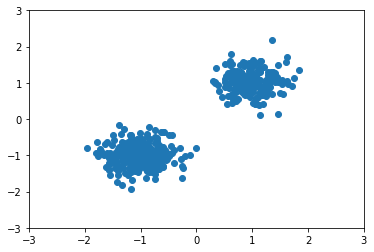

In [55]:
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.axis([-3, 3, -3, 3])
plt.show()

In [56]:
from edward.models import Dirichlet, InverseGamma, MultivariateNormalDiag, \
    Normal, ParamMixture

K = 2  # number of components

pi = Dirichlet(tf.ones(K))
mu = Normal(tf.zeros(D), tf.ones(D), sample_shape=K)
sigmasq = InverseGamma(tf.ones(D), tf.ones(D), sample_shape=K)
x = ParamMixture(pi, {'loc': mu, 'scale_diag': tf.sqrt(sigmasq)},
                 MultivariateNormalDiag,
                 sample_shape=N)
z = x.cat

NameError: name 'tf' is not defined

In [60]:
!pip install sklearn

    100% |████████████████████████████████| 12.4MB 156kB/s eta 0:00:01
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /home/dlrc/.cache/pip/wheels/d7/db/a3/1b8041ab0be63b5c96c503df8e757cf205c2848cf9ef55f85e
Successfully built sklearn


In [131]:
import os
directory = '/home/dlrc/datasets/training_data/legos'
def img_paths(directory):
    return [os.path.join(root, f) for root, _, files in os.walk(directory)
            for f in files if f != "target.png"]

  
  
paths = img_paths(directory)
def func(x):
  x = x.split("/")
  return x[-3], x[-2]

classes = [func(x) for x in paths]


classes_shapes = map(lambda x: x[0],classes)
classes_color = map(lambda x: x[1],classes)

In [80]:
from scipy import misc
from tqdm import tqdm
import cv2
images = []
for img_path in tqdm(paths):
  img = misc.imread(img_path, mode='RGB')
  img = cv2.resize(img, (224,224))
  images.append(np.expand_dims(img,0))
images = np.asarray(images)



100%|██████████| 13600/13600 [00:06<00:00, 1951.65it/s]


In [82]:
#Do predictions

neural_net_predictions = []
for img in tqdm(images):
  predictions = model.predict(img)
  neural_net_predictions.append(predictions.reshape(-1))
neural_net_predictions = np.asarray(neural_net_predictions)



100%|██████████| 13600/13600 [01:46<00:00, 128.11it/s]


In [132]:
classes_shapes = list(classes_shapes)

In [133]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
classes_shapes_encoded = le.fit_transform(list(classes_shapes))
le = preprocessing.LabelEncoder()
classes_color_encoded = le.fit_transform(list(classes_color))



In [134]:
classes_shapes_encoded

array([3, 3, 3, ..., 1, 1, 1])

In [105]:
X

array([[ 0.        ,  0.94238901,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.1076169 ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [136]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
#Load boston housing dataset as an example
X = neural_net_predictions
Y = list(classes_shapes_encoded)
names = np.arange(X[0].shape[0])
rf = RandomForestRegressor()
rf.fit(X, Y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.036700000000000003, 24742), (0.023800000000000002, 18067), (0.022499999999999999, 3102), (0.0172, 24653), (0.0094999999999999998, 18168), (0.0083999999999999995, 10270), (0.0077000000000000002, 25336), (0.0071000000000000004, 31975), (0.0054000000000000003, 32712), (0.0044000000000000003, 30883), (0.0040000000000000001, 25426), (0.0035999999999999999, 16066), (0.0033, 25544), (0.0030000000000000001, 31688), (0.0027000000000000001, 24402), (0.0027000000000000001, 17485), (0.0025000000000000001, 25000), (0.0025000000000000001, 17414), (0.0025000000000000001, 11000), (0.0023, 24324), (0.0023, 24214), (0.0020999999999999999, 24727), (0.0020999999999999999, 18222), (0.0020999999999999999, 17322), (0.0019, 2925), (0.0018, 18346), (0.0018, 3281), (0.0016999999999999999, 17664), (0.0016999999999999999, 16593), (0.0016999999999999999, 16477), (0.0016999999999999999, 11512), (0.0016999999999999999, 8838), (0.0016000000000000001, 26612), (0.0016000000000000001,

In [227]:
sorted_features = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True)
sorted_features = sorted_features
sorted_features = list(map(lambda x: x[1], sorted_features))


In [228]:
print(sorted_features)

[24742, 18067, 3102, 24653, 18168, 10270, 25336, 31975, 32712, 30883, 25426, 16066, 25544, 31688, 24402, 17485, 25000, 17414, 11000, 24324, 24214, 24727, 18222, 17322, 2925, 18346, 3281, 17664, 16593, 16477, 11512, 8838, 26612, 25582, 25525, 24807, 18236, 15366, 2945, 10488, 18271, 18183, 17907, 17144, 32562, 17090, 12346, 2547, 31649, 12285, 10095, 8691, 1207, 39383, 30932, 24558, 23850, 23764, 10739, 10528, 10188, 3949, 30314, 29966, 25778, 19848, 18419, 18340, 18088, 17859, 17217, 17212, 15834, 11215, 9949, 9497, 37843, 35006, 23659, 17548, 14617, 10227, 9972, 4894, 7, 45146, 37831, 34313, 31021, 27636, 24484, 22635, 19295, 17390, 16832, 16789, 15930, 13704, 12238, 12203, 10284, 10165, 9715, 9464, 5624, 3571, 3320, 3255, 495, 183, 45279, 38506, 35114, 33432, 33289, 32362, 31998, 25505, 25473, 24526, 23300, 23213, 18258, 17156, 16044, 14830, 14820, 11261, 11224, 11221, 10904, 10640, 9914, 9654, 9403, 6858, 4053, 2804, 841, 39381, 38002, 36063, 33324, 30951, 30886, 28668, 28141, 26581

In [225]:
shape_feature_indices = sorted_features
print(color_feature_indices)

[25519, 16964, 10071, 32687, 13174, 48585, 17754, 36306, 24108, 33711, 25198, 17468, 31804, 25622, 17870, 4084, 41417, 24133, 18351, 39441, 31663, 19450, 3958, 30780, 24222, 17988, 9562, 18213, 34724, 18426, 9391, 3927, 42441, 38860, 38295, 32828, 31204, 24978, 24224, 19690, 17989, 17436, 16010, 15938, 10068, 45475, 39964, 34376, 29724, 24029, 18030, 15704, 12122, 11562, 44889, 40465, 36030, 34945, 34618, 32759, 32273, 28503, 28069, 24830, 24507, 24072, 23612, 22592, 21252, 18363, 17291, 16780, 12674, 8209, 7623, 4562, 3924, 2121, 1123, 47838, 47570, 46251, 45477, 40514, 40009, 38417, 34630, 33398, 33212, 32723, 32325, 31922, 27180, 26180, 25778, 25157, 25070, 23828, 21883, 20018]


In [103]:
color_feature_indices = sorted_features
print(color_feature_indices)

[25519, 16964, 10071, 32687, 13174, 48585, 17754, 36306, 24108, 33711, 25198, 17468, 31804, 25622, 17870, 4084, 41417, 24133, 18351, 39441, 31663, 19450, 3958, 30780, 24222, 17988, 9562, 18213, 34724, 18426, 9391, 3927, 42441, 38860, 38295, 32828, 31204, 24978, 24224, 19690, 17989, 17436, 16010, 15938, 10068, 45475, 39964, 34376, 29724, 24029, 18030, 15704, 12122, 11562, 44889, 40465, 36030, 34945, 34618, 32759, 32273, 28503, 28069, 24830, 24507, 24072, 23612, 22592, 21252, 18363, 17291, 16780, 12674, 8209, 7623, 4562, 3924, 2121, 1123, 47838, 47570, 46251, 45477, 40514, 40009, 38417, 34630, 33398, 33212, 32723, 32325, 31922, 27180, 26180, 25778, 25157, 25070, 23828, 21883, 20018]


In [101]:
important_features = X[:, sorted_features]

In [102]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import numpy as np
#Load boston housing dataset as an example
X = important_features
Y = class_shape_encoded
names = np.arange(X[0].shape[0])
rf = RandomForestRegressor()
rf.fit(X, Y)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
             reverse=True))

Features sorted by their score:
[(0.017500000000000002, 0), (0.017399999999999999, 7), (0.016500000000000001, 1), (0.016400000000000001, 68), (0.015900000000000001, 85), (0.015800000000000002, 94), (0.0154, 82), (0.015299999999999999, 33), (0.014999999999999999, 56), (0.0149, 43), (0.014500000000000001, 72), (0.0144, 34), (0.0141, 80), (0.0141, 42), (0.0141, 15), (0.014, 55), (0.0138, 48), (0.0137, 75), (0.0134, 18), (0.0132, 57), (0.012999999999999999, 19), (0.0129, 84), (0.0129, 46), (0.0129, 2), (0.012699999999999999, 95), (0.0126, 88), (0.0126, 37), (0.0123, 41), (0.0123, 3), (0.012200000000000001, 36), (0.0121, 44), (0.012, 77), (0.012, 74), (0.011900000000000001, 81), (0.011900000000000001, 60), (0.0118, 70), (0.011599999999999999, 79), (0.011599999999999999, 62), (0.0115, 83), (0.0114, 25), (0.0114, 8), (0.011299999999999999, 92), (0.010999999999999999, 40), (0.0109, 53), (0.0109, 17), (0.010800000000000001, 51), (0.010699999999999999, 47), (0.010699999999999999, 35), (0.0103, 5

# Brick Prediction


[25519,
 16964,
 10071,
 32687,
 13174,
 48585,
 17754,
 36306,
 24108,
 33711,
 25198,
 17468,
 31804,
 25622,
 17870,
 4084,
 41417,
 24133,
 18351,
 39441,
 31663,
 19450,
 3958,
 30780,
 24222,
 17988,
 9562,
 18213,
 34724,
 18426,
 9391,
 3927,
 42441,
 38860,
 38295,
 32828,
 31204,
 24978,
 24224,
 19690,
 17989,
 17436,
 16010,
 15938,
 10068,
 45475,
 39964,
 34376,
 29724,
 24029,
 18030,
 15704,
 12122,
 11562,
 44889,
 40465,
 36030,
 34945,
 34618,
 32759,
 32273,
 28503,
 28069,
 24830,
 24507,
 24072,
 23612,
 22592,
 21252,
 18363,
 17291,
 16780,
 12674,
 8209,
 7623,
 4562,
 3924,
 2121,
 1123,
 47838,
 47570,
 46251,
 45477,
 40514,
 40009,
 38417,
 34630,
 33398,
 33212,
 32723,
 32325,
 31922,
 27180,
 26180,
 25778,
 25157,
 25070,
 23828,
 21883,
 20018]

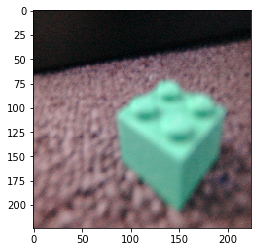

In [216]:
_, brick = cap.read() 
brick = cv2.resize(brick, (224,224))
brick2 = np.copy(brick)
brick2[:,:,0] = brick[:,:,2]
brick2[:,:,2] = brick[:,:,0]

brick_predictions = model.predict(np.expand_dims(brick, 0)).reshape(-1)


plt.imshow(brick2)


In [182]:
brick_predictions.shape

(50176,)

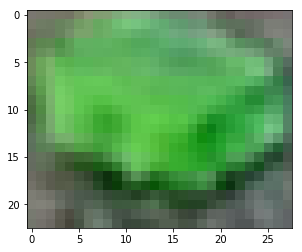

In [217]:
data = np.asarray(data)
mse = data[:, color_feature_indices] - brick_predictions[color_feature_indices]
mse = np.square(mse)
mse = np.sum(mse, axis=1)
plt.imshow(bbox_images[np.argmin(mse)])

In [219]:
shape_feature_indices

NameError: name 'shape_feature_indices' is not defined